In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# reading files

In [2]:
data = pd.read_csv("C:/Users/Kaige Zhang/Desktop/t1.csv")

In [3]:
data.head(5)

,Date,Hour,Minute,Sec,GridVoltage,GenerationCurrent,Impedance,GridCurrent,PowerFactor,GridImportEnergy,GridExportEnergy,GenerationImportEnergy,GenerationExportEnergy,Id
0,2019-01-08,23,36,2,240,1.3,0.0,1.3,0.98,0.1,0.0,0.1,0.0,96
1,2019-01-08,23,44,49,238,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
2,2019-01-08,23,45,49,238,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
3,2019-01-08,23,46,49,239,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
4,2019-01-08,23,47,49,238,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96


In [4]:
data.shape

(6708168, 14)

# group  by date

In [5]:
data = data.drop(['GenerationCurrent'], axis = 1)
data = data.drop(['GenerationImportEnergy'], axis = 1)
data = data.drop(['GenerationExportEnergy'], axis = 1)
data = data.drop(['Impedance'], axis = 1)
data = data.drop(['PowerFactor'], axis = 1)
data = data.drop(['GridExportEnergy'], axis = 1)
data = data.drop(['GridImportEnergy'], axis = 1)
data = data.drop(['GridCurrent'], axis = 1)

In [6]:
data.head(5)

,Date,Hour,Minute,Sec,GridVoltage,Id
0,2019-01-08,23,36,2,240,96
1,2019-01-08,23,44,49,238,96
2,2019-01-08,23,45,49,238,96
3,2019-01-08,23,46,49,239,96
4,2019-01-08,23,47,49,238,96


In [7]:
weekday_data1 =  data[data['Date'] >= '2019-02-26']
weekday_data2 = data[data['Date'] <= '2019-02-26']
# 取并集
weekday_data = pd.merge (weekday_data1,weekday_data2,on=['Id', 'Date', 'Hour', 'Minute', 'Sec', 'GridVoltage'])
weekday_data = weekday_data.groupby(['Id','Date','Hour','Minute']).mean()
weekday_data = weekday_data.reset_index()

In [8]:
weekday_data.head()

,Id,Date,Hour,Minute,Sec,GridVoltage
0,4,2019-02-26,0,0,38.0,244.0
1,4,2019-02-26,0,2,38.0,244.0
2,4,2019-02-26,0,4,38.0,245.0
3,4,2019-02-26,0,8,40.0,245.0
4,4,2019-02-26,0,10,39.0,245.0


In [9]:
Hour_list = weekday_data['Hour'].drop_duplicates().tolist()

In [10]:
date_list = weekday_data['Date'].drop_duplicates().tolist()

In [11]:
id_list = weekday_data['Id'].drop_duplicates().tolist()

In [12]:
# 创建一个新的空的datafram， 分段 10min
ten_minutes = pd.DataFrame(columns = ['Id','Segment', 'GridVoltage'])
ten_minutes.head()


for i in range(len(id_list)):
    segment = 0 
    for d in range(len(date_list)):
        print(i,d)
        tem = weekday_data[weekday_data['Date'] == date_list[d]]
#         print(tem)
        temp = tem[tem['Id'] == id_list[i]]
        for k in range(len(Hour_list)):
            # 找出一个小时的
            temp2 = temp[temp['Hour']== Hour_list[k]]
    #         print(temp2)
            # 每个小时6个10min
            for j in range(6):  
                rows = temp2.loc[(temp2['Minute'] >= j * 10) & (temp2['Minute'] < (j + 1) * 10)]
#                 print(rows)
                avg = rows['GridVoltage'].mean()
        #         print(avg)

                row = {'Id':id_list[i], 'Segment':segment, 'GridVoltage':avg}
                segment += 1
    #             print(row)
                ten_minutes = ten_minutes.append([row], ignore_index=True)
        #         print(ten_minutes)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0


In [13]:
ten_minutes.head()

,Id,Segment,GridVoltage
0,4,0,244.500000
1,4,1,244.250000
2,4,2,244.000000
3,4,3,244.333333
4,4,4,243.666667


In [14]:
ten_minutes.shape

(5328, 3)

In [15]:
#  ten_minutes.drop(ten_minutes.columns[len(ten_minutes.columns)-1], axis=1, inplace=True)

In [16]:
# find Na
nan = ten_minutes[ten_minutes.isnull().T.any()]
null_list = nan['Segment'].drop_duplicates().tolist()

In [17]:
tm = ten_minutes

In [18]:
for i in range(len(null_list)):
    ten_minutes = ten_minutes[~ten_minutes['Segment'].isin([null_list[i]])]

In [19]:
ten_minutes.shape

(4625, 3)

In [20]:
col = ['Id']
col += [x for x in range(144)]

data_ten_minutes = pd.DataFrame(columns = col)
for i in range(len(id_list)):
    temp = ten_minutes[ten_minutes['Id'] == id_list[i]]
    vol = temp['GridVoltage'].tolist()
#     vol.insert(0, id_list[i])
#     print(len(vol))
    row = {'Id':id_list[i]}
    for i in range(len(vol)):
        row[i] = vol[i]
#     print(row)
    data_ten_minutes = data_ten_minutes.append([row], ignore_index=True)
    

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [21]:
data_ten_minutes.head()

,Id,0,1,2,3,4,5,6,7,8,...,134,135,136,137,138,139,140,141,142,143
0,4,244.5,244.25,244.0,244.333333,243.666667,243.666667,243.666667,244.25,245.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,247.0,246.20,245.4,245.166667,247.062500,245.300000,246.000000,247.20,246.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,244.0,243.70,243.6,243.900000,244.000000,243.600000,243.500000,244.50,244.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,242.1,240.20,240.0,241.500000,241.700000,242.000000,241.300000,243.20,243.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,241.9,239.60,239.7,241.187500,241.100000,240.700000,240.400000,243.70,243.900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
tranpose_ten = pd.DataFrame(data_ten_minutes.values.T, index=data_ten_minutes.columns, columns=data_ten_minutes.index)

In [23]:
tranpose_ten = tranpose_ten.drop(labels='Id', axis=0)

In [24]:
tranpose_ten.columns = id_list

In [25]:
tranpose_ten

,4,5,8,10,12,15,16,17,18,29,...,66,70,75,76,78,85,92,96,99,100
0,244.5,247,244,242.1,241.9,245.3,247.3,247.1,244.9,247.4,...,242.8,241.4,241.9,250.6,243.6,242.2,247.4,245.2,242.889,241.3
1,244.25,246.2,243.7,240.2,239.6,245,246.5,246.3,244.8,246.4,...,240.4,239.2,239.6,247.9,241.7,240.1,246.6,244.2,240.4,239.7
2,244,245.4,243.6,240,239.7,244.9,246.2,246.444,244.8,246.3,...,240.5,239.2,239.8,247.4,241.5,240.1,246.333,243.8,240.2,239.1
3,244.333,245.167,243.9,241.5,241.188,245,245.5,246.1,244.7,246.111,...,241.7,240.7,241.444,247.5,242.7,241.722,246.1,244.7,241.8,240.778
4,243.667,247.062,244,241.7,241.1,245,247.3,247.2,244,247.188,...,242.1,241,241.333,249.2,242.7,241.4,247.5,244.1,242,241.5
5,243.667,245.3,243.6,242,240.7,244.7,245.7,245.9,244.3,245.9,...,241.6,240.6,240.6,249.1,242.667,240.2,246,244.3,241.4,242
6,243.667,246,243.5,241.3,240.4,244.9,246,246.1,244.1,246.3,...,240.8,239.6,240.1,247.556,242,239.5,246.1,244.1,240.5,240.9
7,244.25,247.2,244.5,243.2,243.7,245.5,247.6,247.4,244.9,247.6,...,243.6,243.6,243.5,250.3,244.3,243.5,247.8,245.4,244.3,242.9
8,245.167,246.6,244.2,243.6,243.9,245.3,246.8,246.7,245.3,247.4,...,244,243.5,243.8,249.6,244.6,243.9,247.4,245.3,244.4,243.222
9,244.5,244.062,244,242.9,242.7,245,243.5,244.8,244.9,244.5,...,243.1,242.4,242.556,247,243.7,242.7,244.5,243.5,243.3,243.125


In [26]:
tranpose_ten = tranpose_ten.astype(float)
tranpose_ten

,4,5,8,10,12,15,16,17,18,29,...,66,70,75,76,78,85,92,96,99,100
0,244.500000,247.000000,244.0,242.100000,241.900000,245.300000,247.3,247.100000,244.900000,247.400000,...,242.8,241.400000,241.900000,250.600000,243.600000,242.200000,247.400000,245.200000,242.888889,241.300000
1,244.250000,246.200000,243.7,240.200000,239.600000,245.000000,246.5,246.300000,244.800000,246.400000,...,240.4,239.200000,239.600000,247.900000,241.700000,240.100000,246.600000,244.200000,240.400000,239.700000
2,244.000000,245.400000,243.6,240.000000,239.700000,244.900000,246.2,246.444444,244.800000,246.300000,...,240.5,239.200000,239.800000,247.400000,241.500000,240.100000,246.333333,243.800000,240.200000,239.100000
3,244.333333,245.166667,243.9,241.500000,241.187500,245.000000,245.5,246.100000,244.700000,246.111111,...,241.7,240.700000,241.444444,247.500000,242.700000,241.722222,246.100000,244.700000,241.800000,240.777778
4,243.666667,247.062500,244.0,241.700000,241.100000,245.000000,247.3,247.200000,244.000000,247.187500,...,242.1,241.000000,241.333333,249.200000,242.700000,241.400000,247.500000,244.100000,242.000000,241.500000
5,243.666667,245.300000,243.6,242.000000,240.700000,244.700000,245.7,245.900000,244.300000,245.900000,...,241.6,240.600000,240.600000,249.100000,242.666667,240.200000,246.000000,244.300000,241.400000,242.000000
6,243.666667,246.000000,243.5,241.300000,240.400000,244.900000,246.0,246.100000,244.100000,246.300000,...,240.8,239.600000,240.100000,247.555556,242.000000,239.500000,246.100000,244.100000,240.500000,240.900000
7,244.250000,247.200000,244.5,243.200000,243.700000,245.500000,247.6,247.400000,244.900000,247.600000,...,243.6,243.600000,243.500000,250.300000,244.300000,243.500000,247.800000,245.400000,244.300000,242.900000
8,245.166667,246.600000,244.2,243.600000,243.900000,245.300000,246.8,246.700000,245.300000,247.400000,...,244.0,243.500000,243.800000,249.600000,244.600000,243.900000,247.400000,245.300000,244.400000,243.222222
9,244.500000,244.062500,244.0,242.900000,242.700000,245.000000,243.5,244.800000,244.900000,244.500000,...,243.1,242.400000,242.555556,247.000000,243.700000,242.700000,244.500000,243.500000,243.300000,243.125000


In [27]:
ten_corr = tranpose_ten.corr()
ten_corr

,4,5,8,10,12,15,16,17,18,29,...,66,70,75,76,78,85,92,96,99,100
4,1.000000,0.414118,0.806278,0.611697,0.595786,0.916056,0.423247,0.519358,0.951765,0.496316,...,0.598112,0.593317,0.603338,0.649074,0.688178,0.602126,0.406423,0.746057,0.612581,0.505392
5,0.414118,1.000000,0.420454,0.197320,0.150429,0.456809,0.953901,0.927481,0.438624,0.953651,...,0.178217,0.133676,0.167837,0.459115,0.279849,0.172348,0.939089,0.074857,0.180853,0.188075
8,0.806278,0.420454,1.000000,0.831088,0.785444,0.855756,0.426290,0.558127,0.839257,0.517549,...,0.787647,0.771112,0.789231,0.669311,0.861587,0.787467,0.441791,0.668719,0.799911,0.730438
10,0.611697,0.197320,0.831088,1.000000,0.966837,0.611879,0.184390,0.268669,0.634471,0.251226,...,0.939223,0.957523,0.961949,0.581719,0.941363,0.957120,0.198149,0.541402,0.957809,0.920766
12,0.595786,0.150429,0.785444,0.966837,1.000000,0.565743,0.137772,0.203053,0.603216,0.189738,...,0.979326,0.996079,0.996829,0.586173,0.964165,0.991738,0.135119,0.610816,0.992883,0.915747
15,0.916056,0.456809,0.855756,0.611879,0.565743,1.000000,0.478152,0.593915,0.962729,0.569854,...,0.569465,0.558991,0.573432,0.749943,0.680840,0.569892,0.482954,0.779119,0.582311,0.462830
16,0.423247,0.953901,0.426290,0.184390,0.137772,0.478152,1.000000,0.931416,0.466482,0.964648,...,0.172088,0.118371,0.149901,0.450381,0.270539,0.157399,0.960148,0.143828,0.167902,0.159723
17,0.519358,0.927481,0.558127,0.268669,0.203053,0.593915,0.931416,1.000000,0.581483,0.979453,...,0.233415,0.182698,0.217496,0.523328,0.356102,0.227252,0.952068,0.212628,0.237077,0.235374
18,0.951765,0.438624,0.839257,0.634471,0.603216,0.962729,0.466482,0.581483,1.000000,0.553387,...,0.612875,0.598670,0.612622,0.707800,0.706790,0.612556,0.471281,0.773970,0.622842,0.520095
29,0.496316,0.953651,0.517549,0.251226,0.189738,0.569854,0.964648,0.979453,0.553387,1.000000,...,0.222812,0.170968,0.205114,0.520932,0.338820,0.214071,0.974093,0.189071,0.225160,0.207754


In [28]:
dissimilarity = 1 - np.abs(ten_corr)

In [29]:
dissimilarity

,4,5,8,10,12,15,16,17,18,29,...,66,70,75,76,78,85,92,96,99,100
4,0.000000,0.585882,0.193722,0.388303,0.404214,0.083944,0.576753,0.480642,0.048235,0.503684,...,0.401888,0.406683,0.396662,0.350926,0.311822,0.397874,0.593577,0.253943,0.387419,0.494608
5,0.585882,0.000000,0.579546,0.802680,0.849571,0.543191,0.046099,0.072519,0.561376,0.046349,...,0.821783,0.866324,0.832163,0.540885,0.720151,0.827652,0.060911,0.925143,0.819147,0.811925
8,0.193722,0.579546,0.000000,0.168912,0.214556,0.144244,0.573710,0.441873,0.160743,0.482451,...,0.212353,0.228888,0.210769,0.330689,0.138413,0.212533,0.558209,0.331281,0.200089,0.269562
10,0.388303,0.802680,0.168912,0.000000,0.033163,0.388121,0.815610,0.731331,0.365529,0.748774,...,0.060777,0.042477,0.038051,0.418281,0.058637,0.042880,0.801851,0.458598,0.042191,0.079234
12,0.404214,0.849571,0.214556,0.033163,0.000000,0.434257,0.862228,0.796947,0.396784,0.810262,...,0.020674,0.003921,0.003171,0.413827,0.035835,0.008262,0.864881,0.389184,0.007117,0.084253
15,0.083944,0.543191,0.144244,0.388121,0.434257,0.000000,0.521848,0.406085,0.037271,0.430146,...,0.430535,0.441009,0.426568,0.250057,0.319160,0.430108,0.517046,0.220881,0.417689,0.537170
16,0.576753,0.046099,0.573710,0.815610,0.862228,0.521848,0.000000,0.068584,0.533518,0.035352,...,0.827912,0.881629,0.850099,0.549619,0.729461,0.842601,0.039852,0.856172,0.832098,0.840277
17,0.480642,0.072519,0.441873,0.731331,0.796947,0.406085,0.068584,0.000000,0.418517,0.020547,...,0.766585,0.817302,0.782504,0.476672,0.643898,0.772748,0.047932,0.787372,0.762923,0.764626
18,0.048235,0.561376,0.160743,0.365529,0.396784,0.037271,0.533518,0.418517,0.000000,0.446613,...,0.387125,0.401330,0.387378,0.292200,0.293210,0.387444,0.528719,0.226030,0.377158,0.479905
29,0.503684,0.046349,0.482451,0.748774,0.810262,0.430146,0.035352,0.020547,0.446613,0.000000,...,0.777188,0.829032,0.794886,0.479068,0.661180,0.785929,0.025907,0.810929,0.774840,0.792246


In [30]:
import seaborn as sns

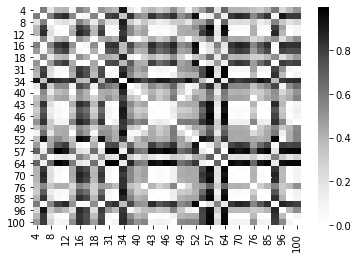

In [31]:
# plot heatmap
ax = sns.heatmap(dissimilarity.T, cmap="Greys")


# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('seabornPandas.png', dpi=1000)
plt.show()

# kmeans

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


In [33]:
clinski_harabaz_scores = []
cluster_num = range(2, 10)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    predict = kmeans.fit_predict(dissimilarity)
    clinski_harabaz_scores.append(metrics.calinski_harabasz_score(dissimilarity, predict))

In [34]:
clinski_harabaz_scores

[83.29941747085859,
 146.10107450501434,
 136.27024645352313,
 145.45587082879294,
 153.33287828145916,
 176.95588779079088,
 194.4704973208242,
 236.41213576790534]

In [35]:
kmeans = KMeans(n_clusters = 3, n_jobs = 4)
labels_kmeans = kmeans.fit_predict(dissimilarity)

In [36]:
labels_kmeans

array([0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2])

In [37]:
data_ten_minutes['labels_kmeans'] = labels_kmeans

# mean shift

In [38]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [39]:
meanShift = MeanShift(bandwidth=1.3)
labels_mean = meanShift.fit_predict(dissimilarity)

In [40]:
labels_mean

array([1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0], dtype=int64)

In [41]:
data_ten_minutes['labels_meanshift'] = labels_mean

# DBSCAN

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
labels_dbscan = DBSCAN(eps = 0.36).fit_predict(dissimilarity)

In [44]:
labels_dbscan

array([ 1, -1, -1,  0,  0,  1, -1, -1,  1, -1,  0,  0, -1, -1,  1, -1,  0,
        0,  0, -1, -1,  1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,  0, -1,
       -1,  0,  0], dtype=int64)

In [45]:
data_ten_minutes['labels_dbscan'] = labels_dbscan + 1

# Gaussian 

In [46]:
from sklearn import mixture

In [47]:
labels_gaussian = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(dissimilarity).predict(dissimilarity)

In [48]:
labels_gaussian

array([0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2], dtype=int64)

In [49]:
data_ten_minutes['labels_gaussian'] = labels_gaussian

### 删除id 8 和34， 这两个id无原始label

In [50]:
labels =  [2,1,0,2,2,1,1,2,0,0,0,2,2,1,0,0,0,0,2,2,2,1,1,0,1,0,0,0,1,0,0,1,2,0,0]
 # 删除id = 8 id = 34 因为没有这两个id的label
data_ten_minutes =  data_ten_minutes.drop(labels=2, axis=0)
data_ten_minutes = data_ten_minutes.drop(labels=12, axis=0)

data_ten_minutes['labels'] = labels
data_ten_minutes

,Id,0,1,2,3,4,5,6,7,8,...,139,140,141,142,143,labels_kmeans,labels_meanshift,labels_dbscan,labels_gaussian,labels
0,4,244.500000,244.250000,244.000000,244.333333,243.666667,243.666667,243.666667,244.250000,245.166667,...,NaN,NaN,NaN,NaN,NaN,0,1,2,0,2
1,5,247.000000,246.200000,245.400000,245.166667,247.062500,245.300000,246.000000,247.200000,246.600000,...,NaN,NaN,NaN,NaN,NaN,1,2,0,1,1
3,10,242.100000,240.200000,240.000000,241.500000,241.700000,242.000000,241.300000,243.200000,243.600000,...,NaN,NaN,NaN,NaN,NaN,2,0,1,2,0
4,12,241.900000,239.600000,239.700000,241.187500,241.100000,240.700000,240.400000,243.700000,243.900000,...,NaN,NaN,NaN,NaN,NaN,2,0,1,2,2
5,15,245.300000,245.000000,244.900000,245.000000,245.000000,244.700000,244.900000,245.500000,245.300000,...,NaN,NaN,NaN,NaN,NaN,0,1,2,0,2
6,16,247.300000,246.500000,246.200000,245.500000,247.300000,245.700000,246.000000,247.600000,246.800000,...,NaN,NaN,NaN,NaN,NaN,1,2,0,1,1
7,17,247.100000,246.300000,246.444444,246.100000,247.200000,245.900000,246.100000,247.400000,246.700000,...,NaN,NaN,NaN,NaN,NaN,1,2,0,1,1
8,18,244.900000,244.800000,244.800000,244.700000,244.000000,244.300000,244.100000,244.900000,245.300000,...,NaN,NaN,NaN,NaN,NaN,0,1,2,0,2
9,29,247.400000,246.400000,246.300000,246.111111,247.187500,245.900000,246.300000,247.600000,247.400000,...,NaN,NaN,NaN,NaN,NaN,1,2,0,1,0
10,31,241.500000,239.900000,239.200000,240.800000,241.500000,242.100000,240.700000,242.900000,243.500000,...,NaN,NaN,NaN,NaN,NaN,2,0,1,2,0


# plot 原始图

In [51]:
import matplotlib.pyplot as plt

from collections import OrderedDict

IndexError: index 150 is out of bounds for axis 0 with size 150

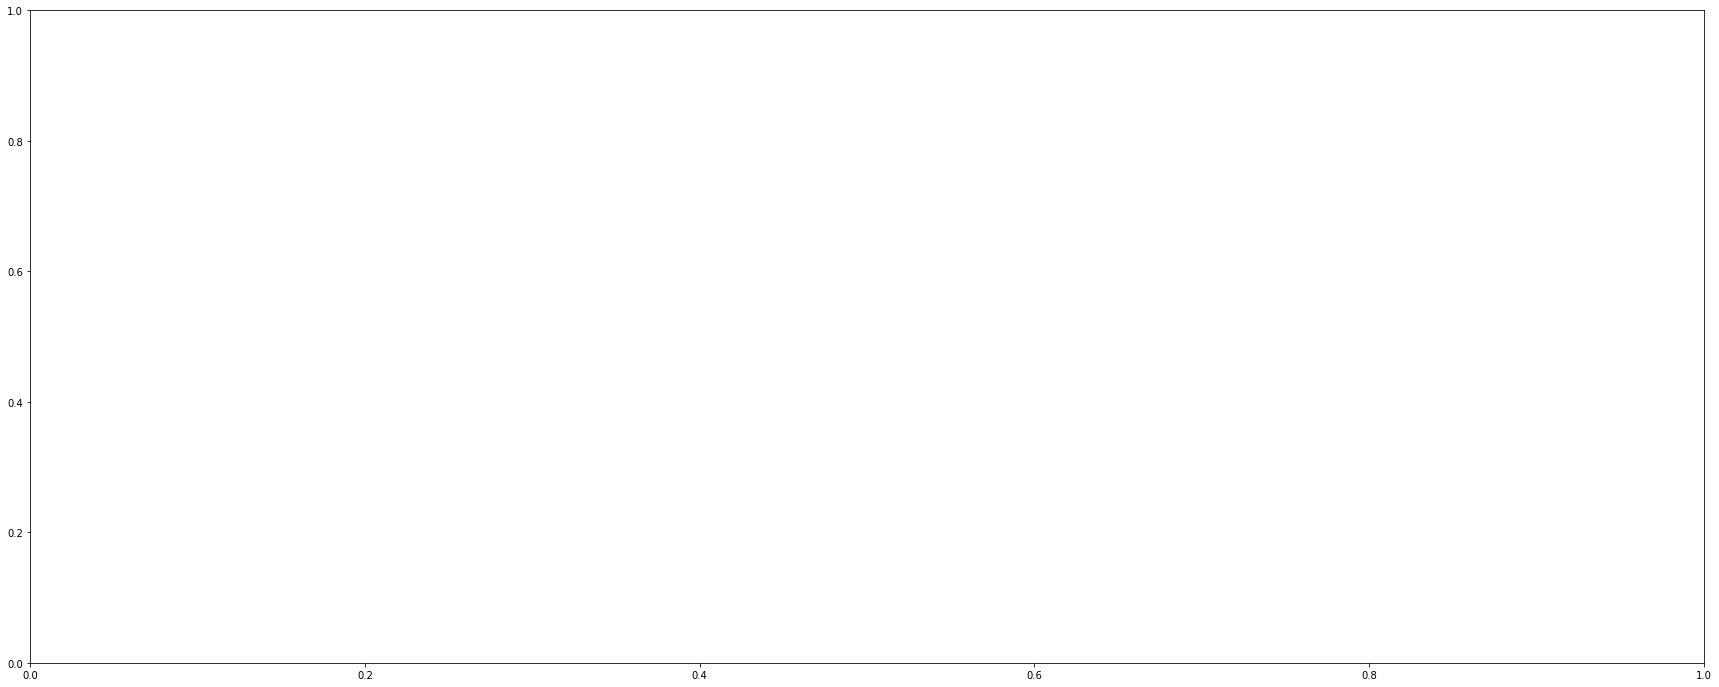

In [52]:
cur_idlist = id_list[:2] + id_list[3:12] + id_list[13:]  # 删除8和34的id list

color_list = ['red','green','blue']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('original Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot kmeans label

In [ ]:
cur_idlist = id_list[:2] + id_list[3:12] + id_list[13:]  # 删除8和34的id list

color_list = ['blue','red','green']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_kmeans'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Kmeans Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot meanshift

In [ ]:
color_list = ['red','blue','green']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_meanshift'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))
    
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc = 'lower right',fontsize = 30)
plt.title('Mean shift Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()

# plot DBSCAN

In [ ]:
color_list = ['blue','green','red']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_dbscan'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'lower right',fontsize = 30)

plt.title('DBSCAN Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()



# plot Guassian

In [ ]:
color_list = ['green','red','blue']
cluster_num = 3
x = range(2500)
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(cur_idlist)):
    row = data_ten_minutes[data_ten_minutes['Id'] == cur_idlist[i]]
    idx = row['labels_gaussian'].values[0]
    y =[] 
    for j in range(2500):
        tem = row.iat[0,j+1]
        y.append(tem)
#     print(x, y)
    plt.plot(x,y,color = color_list[idx], label = 'cluster '  + str(idx))

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = 'lower right',fontsize = 30)

plt.title('Guassian Voltage Curve Graph(data on February)', fontsize = 30)
plt.xlabel('Time', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.tick_params(labelsize=20)

plt.tight_layout()
plt.show()


# Confusion Matrix Kmeans

In [ ]:
from sklearn.metrics import confusion_matrix
y_actu = data_ten_minutes['labels']
y_pred = data_ten_minutes['labels_kmeans']
confusion_matrix(y_actu, y_pred)

In [ ]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_kmeans'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

# Confusion Matrix Mean Shift

In [ ]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_meanshift'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

# Confusion Matrix DBSCAN

In [ ]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_dbscan'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

# Confusion Matrix Gaussian

In [ ]:
y_actu = pd.Series(data_ten_minutes['labels'], name='Actual')
y_pred = pd.Series(data_ten_minutes['labels_gaussian'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

# Gaussian Heatmap

In [ ]:
heatmap_kmeans = list(labels_gaussian) 
heatmap_kmeans = heatmap_kmeans[:2] + heatmap_kmeans[3:12] + heatmap_kmeans[13:]
# print(heatmap_kmeans)

# 将每个id 与label 对应
dic = {}
for i in range(len(cur_idlist)):
    dic[cur_idlist[i]] = heatmap_kmeans[i]

# print(dic)

orders = []
for i in range(3):
    for j in range(len(dic)):
        if dic[cur_idlist[j]] == i:
            orders.append(cur_idlist[j])
# orders

heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)

heatmap_ten = heatmap_ten[orders]
heatmap_corr = heatmap_ten.corr()

heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)
    
ax.xaxis.set_ticks_position('top')
    

# save figure
plt.savefig('heatmap_guassian.png', dpi=1000)
plt.show()

# Kmeans Heatmap

In [ ]:
heatmap_kmeans = list(labels_kmeans) 
heatmap_kmeans = heatmap_kmeans[:2] + heatmap_kmeans[3:12] + heatmap_kmeans[13:]
# print(heatmap_kmeans)

# 将每个id 与label 对应
dic = {}
for i in range(len(cur_idlist)):
    dic[cur_idlist[i]] = heatmap_kmeans[i]

print(dic)

orders = []
for i in range(3):
    for j in range(len(dic)):
        if dic[cur_idlist[j]] == i:
            orders.append(cur_idlist[j])
# orders

In [ ]:
heatmap_ten = tranpose_ten
heatmap_ten =  heatmap_ten.drop([8], axis=1)
heatmap_ten = heatmap_ten.drop([34], axis=1)

heatmap_ten = heatmap_ten[orders]

In [ ]:
heatmap_corr = heatmap_ten.corr()

In [ ]:
heat_dissimilarity = 1 - np.abs(heatmap_corr)
ax = sns.heatmap(heat_dissimilarity.T)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('heatmap_kmeans.png', dpi=100)
plt.show()